# Заключительная часть
Перед началом обучения я уже знаю что модель скорей всего будет переобучаться, поэтому моей задачей будет нахождение оптимальных параметров и регуляризаця

In [ ]:
import zipfile
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
!unzip res_logo.zip
!unzip test_logo.zip

In [ ]:
pretrained_model = load_model('logo_model.keras')

model = Sequential()

for layer in pretrained_model.layers[:-6]:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False

model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='conv2d_no_weights'))
model.add(MaxPooling2D((2, 2), name='maxpooling_no_weights'))
model.add(Conv2D(512, (3, 3), activation='selu', padding='same', name='conv2d_no_weights2'))
model.add(MaxPooling2D((2, 2), name='maxpooling_no_weights2'))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(12, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_no_weights (Conv2D)           │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpooling_no_weights (MaxPooling2D) │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_no_weights2 (Conv2D)          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpooling_no_weights2               │ ?                           │               0 │
│ (MaxPooling2D)                       │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,392 (75.75 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19,392 (75.75 KB)

In [ ]:
data_dir = 'res_logo'

batch_size = 32
img_height = 120
img_width = 125
seed = 47

train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names


normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

Found 374 files belonging to 12 classes.
Using 300 files for training.
Found 374 files belonging to 12 classes.
Using 74 files for validation.


❗**Обращаю внимание, что скорость обучения у Adam=0.00001.**❗

Использование низкой скорости обучения как раз сформирует веса модели и не переобучит на начальных стадиях.

In [ ]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 718ms/step - accuracy: 0.0965 - loss: 9.3355 - val_accuracy: 0.0541 - val_loss: 9.3019
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1162 - loss: 9.2878 - val_accuracy: 0.1216 - val_loss: 9.2604
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.1106 - loss: 9.2400 - val_accuracy: 0.1622 - val_loss: 9.2173
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1088 - loss: 9.2082 - val_accuracy: 0.1351 - val_loss: 9.1774
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.1338 - loss: 9.1570 - val_accuracy: 0.1216 - val_loss: 9.1358


In [1]:
for layer in model.layers:
    layer.trainable = True

optimizer =  Adam(learning_rate=1e-3)
optimizer1 = RMSprop(learning_rate=1e-3)
optimizer2 = SGD(learning_rate=1e-3, momentum=0.9)

model.compile(optimizer=optimizer1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[early_stopping, checkpoint]
)

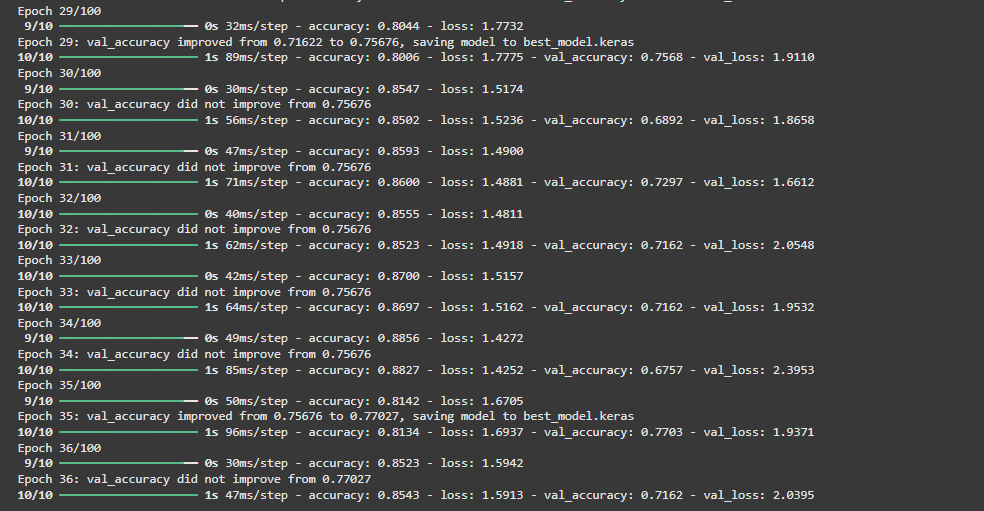

In [2]:
test_dir = 'test_logo'

def load_and_predict(model, test_dir, img_height, img_width, classes):
    images = []
    filenames = []
    predictions = []

    for filename in os.listdir(test_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(test_dir, filename)
            img = load_img(img_path, target_size=(img_height, img_width))
            img_array = img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)
            images.append(img_array[0])
            filenames.append(filename)
            predictions.append(None)

    for i in range(len(images)):
        prediction = model.predict(np.expand_dims(images[i], axis=0))
        predicted_class = classes[np.argmax(prediction)]
        predictions[i] = predicted_class

    return filenames, images, predictions

filenames, images, predictions = load_and_predict(model, test_dir, img_height, img_width, class_names)

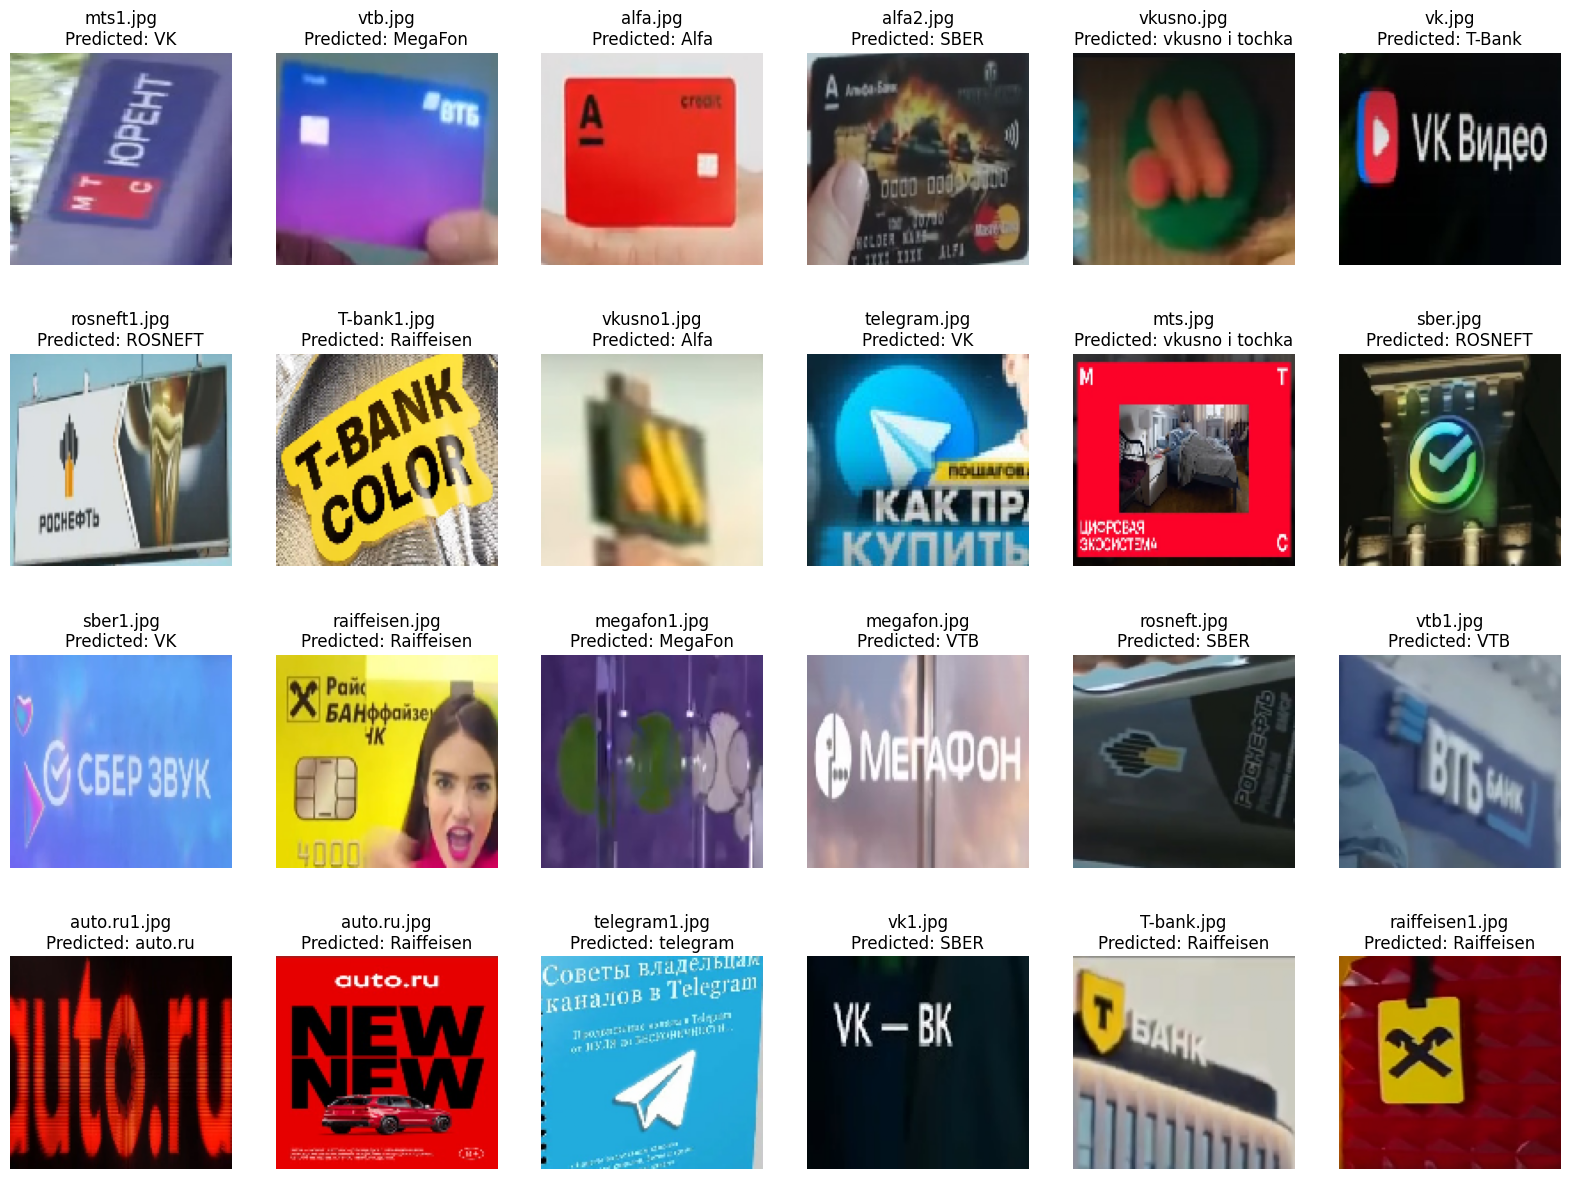

In [ ]:
def display_images(images, predictions, filenames, rows=4, cols=6):
    plt.figure(figsize=(20, 15))
    for i in range(rows * cols):
        if i < len(images):
            plt.subplot(rows, cols, i + 1)
            plt.imshow(images[i])
            plt.title(f'{filenames[i]}\nPredicted: {predictions[i]}')
            plt.axis('off')
    plt.show()

display_images(images, predictions, filenames)

In [ ]:
model = load_model('best_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


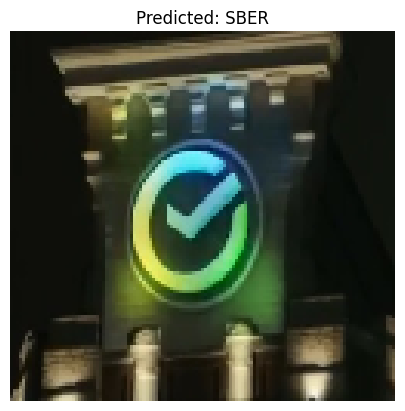

In [ ]:
def load_and_predict_single_image(model, img_path, img_height, img_width, classes):
    img = load_img(img_path, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = classes[np.argmax(prediction)]
    return img_array[0], predicted_class

img_path = 'test_logo/sber.jpg'
image, predicted_class = load_and_predict_single_image(model, img_path, img_height, img_width, class_names)

plt.imshow(image)
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()

# Подведение итогов:
В результате я получил модель, которая угадывает 9 из 24 изображений, на моделе best_model, она верно предсказывает 10 и может классифицировать такие сложные изображения: sber.jpg, mts.jpg и rosneft.jpg

Дальнейшие улучшения:
1. Использование стратифицированной выборки(можно заметить как сеть переобучается некоторыми изображениями, это происходит по методу больших итераций, которые я пытался избегать)
2. Проверка точности на моделе LogoDet, которая имеет плохие и не проверенные веса(модель LogoDet изначально могла не правильно сформировать веса)
3. Использование кросс валидации и нахождение оптимальных параметров
4. Использование одного размера для всех изображений(sber.jpg имеет примерно 60 на 60 пикселей, а auto.ru.jpg имеет 520 на 240, что приводит к неопределенности модели)

Мои наблюдения:
1. Данная модель хорошо обобщает признаки из изображений, если посмотреть, то T-bank классифицируется как raiffeisen, они оба жёлтые что +- простительно для модели. Ключевым решением стало добавление второй свертки с использованием selu
2. Модель LogoDet не успела сформировать оптимальные веса, что приводит к неопределенности
3. Использование оптимизатора RMSprop показало более стабильное обучение, возможно, из-за недообучения т.к модель при нахождении оптимума перестает понимать какие признаки являются важными и начинает прыгать по всем минимумам

В заключение хотелось бы сказать, что модель можно улучшить и достичь окло 70%+ accuracy, но возможно я слишком переоценил себя😝